In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.ensemble as ens
import sklearn.model_selection as ms

In [2]:
df = pd.read_csv('Energy_consumption_dataset.csv')
df

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,12,6,Sunday,Yes,26.338718,52.580000,1563.567259,7,On,On,20.591717,70.270344
4996,12,17,Monday,No,20.007565,42.765607,1999.982252,5,Off,On,7.536319,73.943071
4997,12,13,Thursday,Yes,26.226253,30.015975,1999.982252,5,Off,On,28.162193,85.784613
4998,12,8,Saturday,Yes,24.673206,50.223939,1240.811298,2,On,On,20.918483,63.784001


In [3]:
df[df["Month"] > 12]

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption


Text(0.5, 1.0, 'RenewableEnergy')

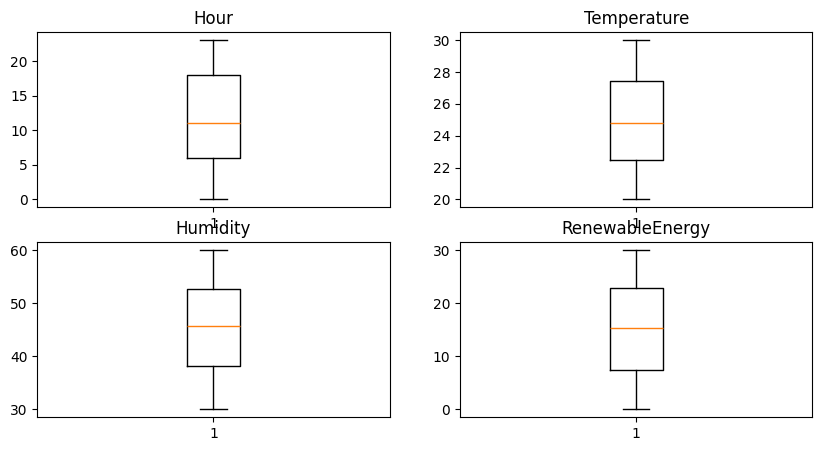

In [4]:
fig , axs = plt.subplots(2, 2, figsize=(10, 5))

axs[0,0].boxplot(df["Hour"])
axs[0,0].set_title("Hour")

axs[0,1].boxplot(df["Temperature"])

axs[0,1].set_title("Temperature")

axs[1,0].boxplot(df["Humidity"])
axs[1,0].set_title("Humidity")

axs[1,1].boxplot(df["RenewableEnergy"])
axs[1,1].set_title("RenewableEnergy")



In [5]:
df["Holiday"] = df["Holiday"].map({"Yes": 1, "No": 0})

In [6]:
df

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,0,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,0,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,0,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,0,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,0,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,12,6,Sunday,1,26.338718,52.580000,1563.567259,7,On,On,20.591717,70.270344
4996,12,17,Monday,0,20.007565,42.765607,1999.982252,5,Off,On,7.536319,73.943071
4997,12,13,Thursday,1,26.226253,30.015975,1999.982252,5,Off,On,28.162193,85.784613
4998,12,8,Saturday,1,24.673206,50.223939,1240.811298,2,On,On,20.918483,63.784001


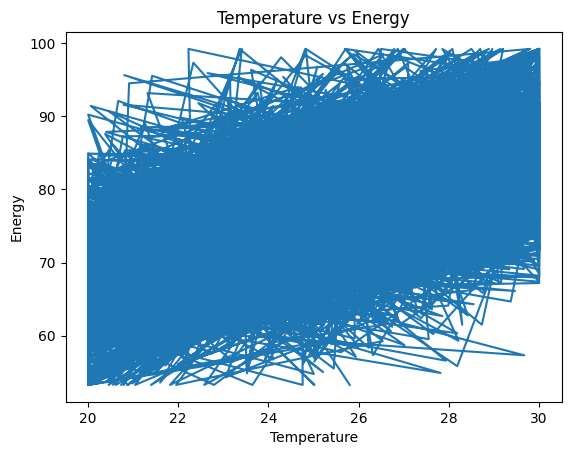

In [8]:
plt.plot(df["Temperature"], df["EnergyConsumption"])
plt.xlabel("Temperature")
plt.ylabel("Energy")
plt.title("Temperature vs Energy")
plt.show()

In [41]:
df["DayOfWeek"].unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [42]:
df["DayOfWeek"] = df["DayOfWeek"].map({"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7})

In [43]:
df["HVACUsage"] = df["HVACUsage"].map({"On": 1, "Off": 0})
df["LightingUsage"] = df["LightingUsage"].map({"On": 1, "Off": 0})

In [44]:
x = df.drop(["EnergyConsumption"], axis=1)
y = df[['EnergyConsumption']]

In [45]:
X_train,x_test,Y_train,y_test = ms.train_test_split(x,y,test_size=0.2,random_state=0)

In [46]:
rf = ens.RandomForestRegressor(n_estimators=100, random_state=0)

In [47]:
rf.fit(X_train,Y_train)

C:\Users\wilsen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=0)

In [50]:
y_pred = rf.predict(x_test)
rf.score(x_test,y_pred)

1.0